### Part II

In [1]:
import os
import pandas as pd
import numpy as np


main_folder = "/content/drive/MyDrive/Colab Notebooks/CalTech projects/Capstone/Capstone 2/Part 2"

os.listdir(main_folder)

['tourism_rating.csv', 'user.csv', 'tourism_with_id.xlsx']

In [2]:
# identify target datasource
tourism_rating_file_path = f'{main_folder}/tourism_rating.csv'
user_file_path = f'{main_folder}/user.csv'
tourism_with_id_file_path = f'{main_folder}/tourism_with_id.xlsx'

# load datasource
users_df = pd.read_csv(user_file_path)
places_df = pd.read_excel(tourism_with_id_file_path)
ratings_df = pd.read_csv(tourism_rating_file_path)


###### Analze data

In [3]:
# Users Data
users_df.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [4]:
# Ratings Data
ratings_df.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [5]:
# Places Data
places_df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [6]:
# info
print("Check info:")
print(users_df.info())
print(ratings_df.info())
print(places_df.info())

# Check for null
print("\n\nCheck null:")
print(users_df.isnull().sum())
print(ratings_df.isnull().sum())
print(places_df.isnull().sum())


#Check for duplicate
print("\n\nCheck duplicate:")
print(users_df.duplicated().sum())
print(ratings_df.duplicated().sum())
print(places_df.duplicated().sum())

Check info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 


###### Missing/Duplicate value handling

In [7]:
# users_df
# No missing values
# No duplicates
# Columns look fine

# ratings_df
# No missing values
# 79 duplicate rows (should be removed)

# places_df
# Time_Minutes has 232 missing values out of 437
# Unnamed: 11 has all null values(can be dropped)
# Unnamed: 12 appears to be an unnamed column with values(analyze further)
# No duplicates

In [8]:
# ratings_df: remove duplicate rows
ratings_df.drop_duplicates(inplace=True)
print(ratings_df.duplicated().sum())

0


In [9]:
# places_df

# drop all null column: Unnamed: 11
places_df.drop(columns=['Unnamed: 11'], inplace=True)

In [12]:
# places_df

# analyze Unnamed: 12 column data
unnamed_values=places_df['Unnamed: 12'].unique()
print(len(unnamed_values))
unnamed_values

437


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [13]:
# removing unnamed:12 column as its just index
places_df.drop(columns=['Unnamed: 12'], inplace=True)

In [16]:
# analyze what Time_Minutes mean
places_df['Time_Minutes'].unique()

array([ 15.,  90., 360.,  nan,  60.,  10., 300., 150.,  45.,  20., 180.,
       120., 240.,  30., 210.,  25.])

In [17]:
# Time_Minutes is valueable feature for recommendation


# create directory of the median values of Time_Minutes for each category of the place
def build_category_median_map(df, category_col='Category', value_col='Time_Minutes'):
    return df.groupby(category_col)[value_col].median().to_dict()

# use this function to fill missing values in Time_Minutes column
def fill_missing_with_category_median(df, category_col, value_col, median_map):
    df[value_col] = df.apply(
        lambda row: median_map[row[category_col]] if pd.isna(row[value_col]) else row[value_col],
        axis=1
    )
    return df

In [18]:
# mapping median of Time_Minutes with place category
category_medians = build_category_median_map(places_df, 'Category', 'Time_Minutes')
category_medians

{'Bahari': 90.0,
 'Budaya': 60.0,
 'Cagar Alam': 90.0,
 'Pusat Perbelanjaan': 60.0,
 'Taman Hiburan': 60.0,
 'Tempat Ibadah': nan}

In [22]:
# since category Tempat Ibadah is missing Time_Minutes median
# so we could either reach to domain expert or look online for clue
# in this case we considering 50 minutes tops for based on online research

category_medians['Tempat Ibadah'] = 50.0
category_medians

{'Bahari': 90.0,
 'Budaya': 60.0,
 'Cagar Alam': 90.0,
 'Pusat Perbelanjaan': 60.0,
 'Taman Hiburan': 60.0,
 'Tempat Ibadah': 50.0}

In [23]:
places_df = fill_missing_with_category_median(places_df, 'Category', 'Time_Minutes', category_medians)
places_df['Time_Minutes'].isnull().sum()

np.int64(0)

##### Outlier detection

In [32]:
# reusable function for outlier detection
def detect_outliers_iqr_all(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    outlier_flags = pd.DataFrame(False, index=df.index, columns=numeric_cols)
    bounds_dict = {}

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Store bounds
        bounds_dict[col] = (lower_bound, upper_bound)

        # Identify outliers
        is_outlier = (df[col] < lower_bound) | (df[col] > upper_bound)
        outlier_flags[col] = is_outlier

        # Print outlier summary
        outlier_values = sorted(df.loc[is_outlier, col].unique())
        print(f"\nColumn: {col}")
        print(f"  Total outliers: {is_outlier.sum()}")
        print(f"  Unique outlier values: {outlier_values}")

In [33]:
# # users_df
print("User data outliers analsis:")
detect_outliers_iqr_all(places_df)

# ratings_df
print("\n\nRatings data outliers analsis:")
detect_outliers_iqr_all(places_df)

# places_df
print("\n\nPlaces data outliers analsis:")
detect_outliers_iqr_all(places_df)

User data outliers analsis:

Column: Place_Id
  Total outliers: 0
  Unique outlier values: []

Column: Price
  Total outliers: 40
  Unique outlier values: [np.int64(60000), np.int64(70000), np.int64(75000), np.int64(80000), np.int64(81000), np.int64(94000), np.int64(95000), np.int64(100000), np.int64(110000), np.int64(115000), np.int64(125000), np.int64(150000), np.int64(175000), np.int64(180000), np.int64(185000), np.int64(200000), np.int64(220000), np.int64(250000), np.int64(270000), np.int64(280000), np.int64(300000), np.int64(375000), np.int64(500000), np.int64(900000)]

Column: Rating
  Total outliers: 3
  Unique outlier values: [np.float64(3.4), np.float64(3.8)]

Column: Time_Minutes
  Total outliers: 28
  Unique outlier values: [np.float64(10.0), np.float64(150.0), np.float64(180.0), np.float64(210.0), np.float64(240.0), np.float64(300.0), np.float64(360.0)]

Column: Lat
  Total outliers: 1
  Unique outlier values: [np.float64(1.07888)]

Column: Long
  Total outliers: 0
  Unique

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots(df, title_prefix="Boxplot", figsize=(15, 6), cols_per_row=3):
    numeric_cols = df.select_dtypes(include=['number']).columns
    total_cols = len(numeric_cols)
    rows = -(-total_cols // cols_per_row)

    plt.figure(figsize=(figsize[0], figsize[1] * rows))

    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols_per_row, i)
        sns.boxplot(x=df[col], color='lightblue', linewidth=1)
        plt.title(f"{title_prefix}: {col}")
        plt.xlabel('')
        plt.grid(True, linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.show()

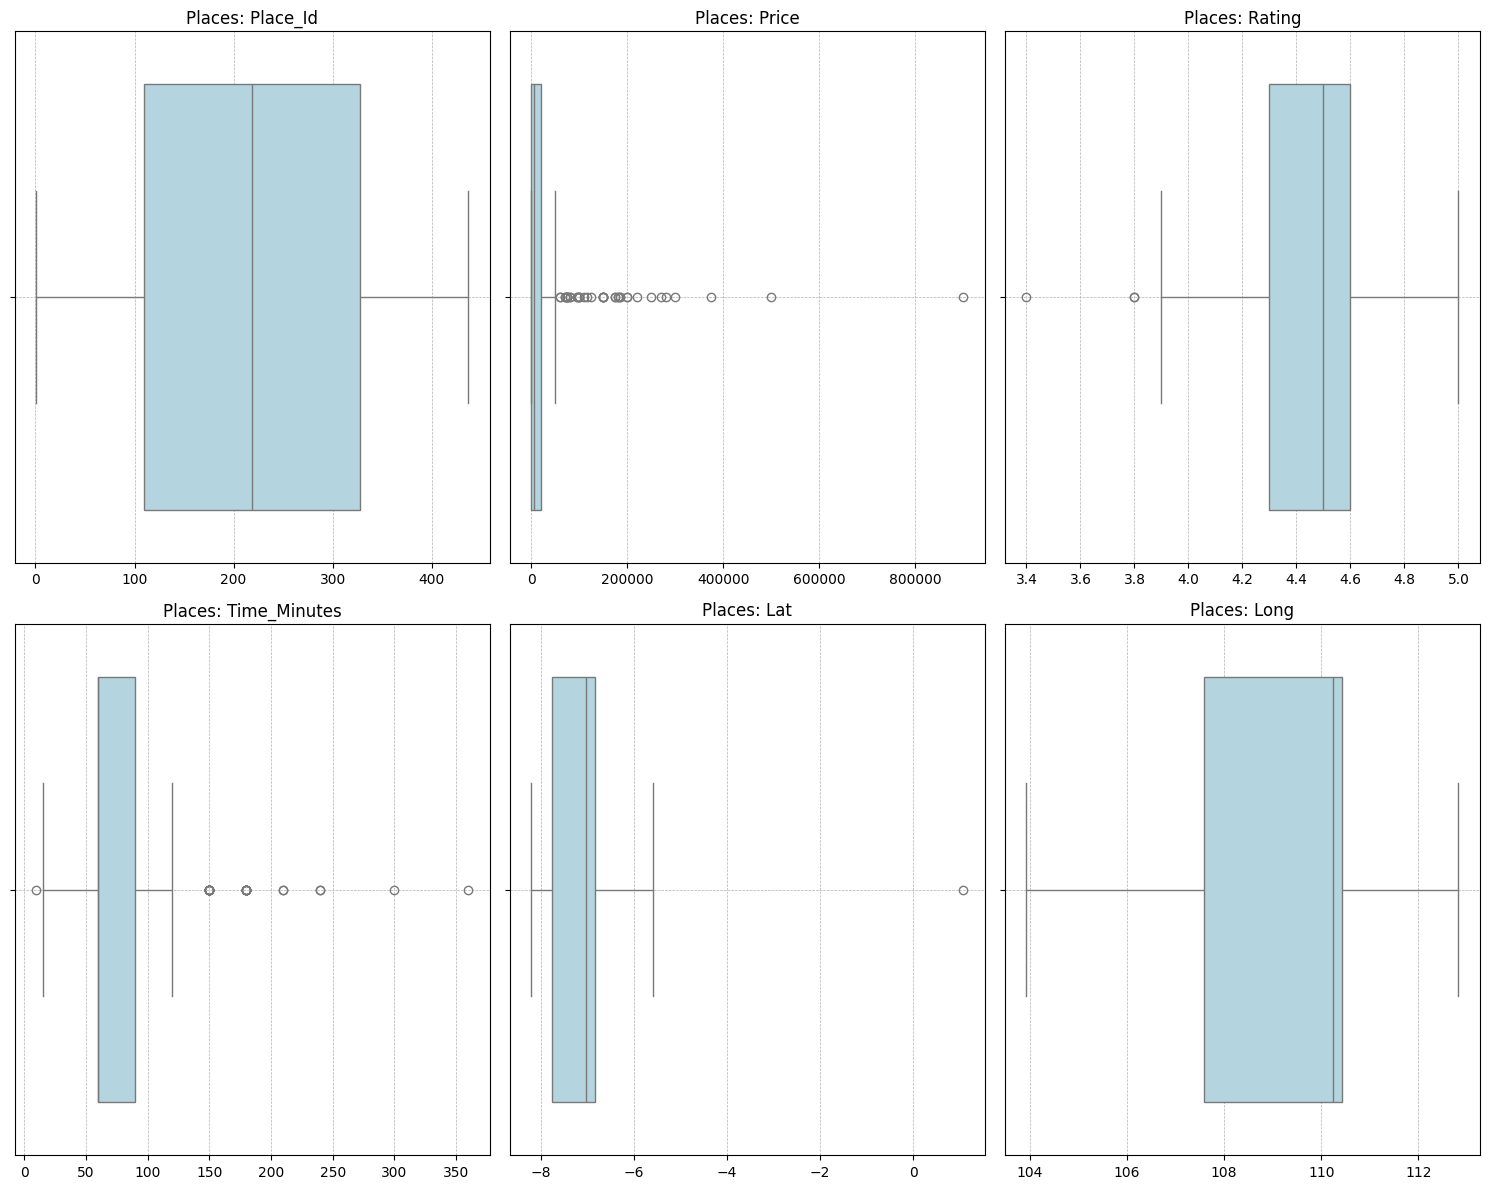

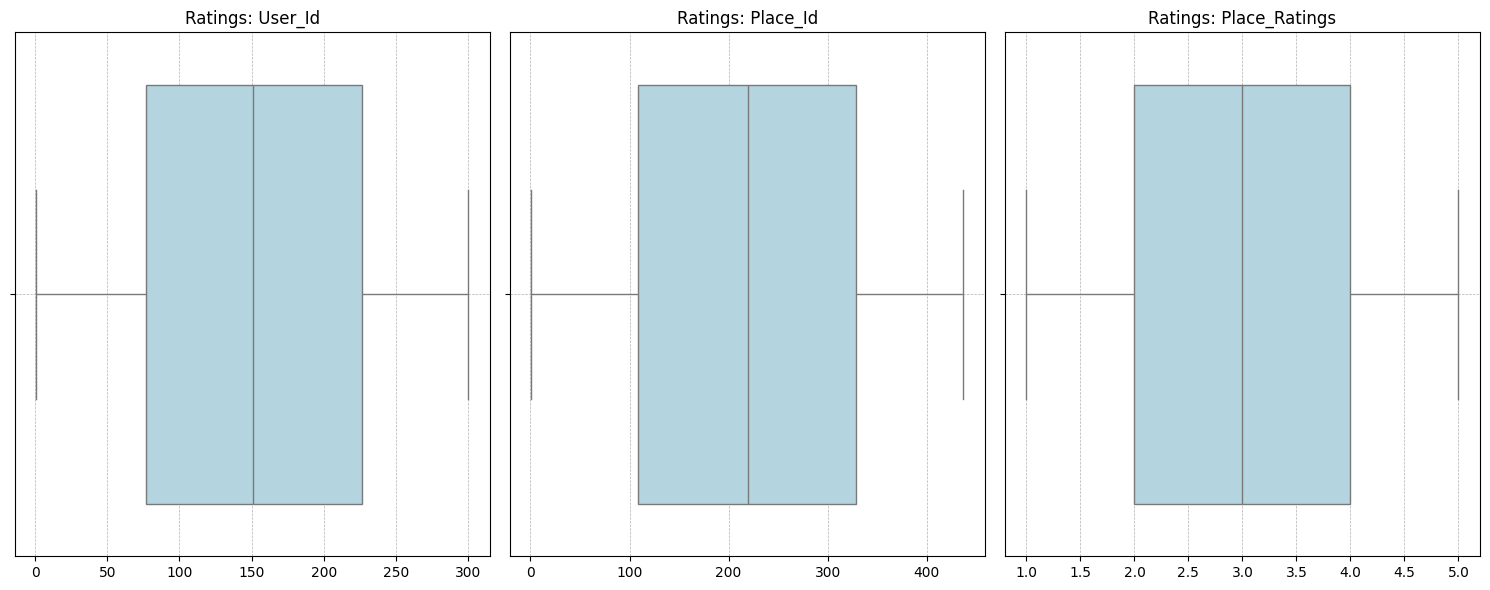

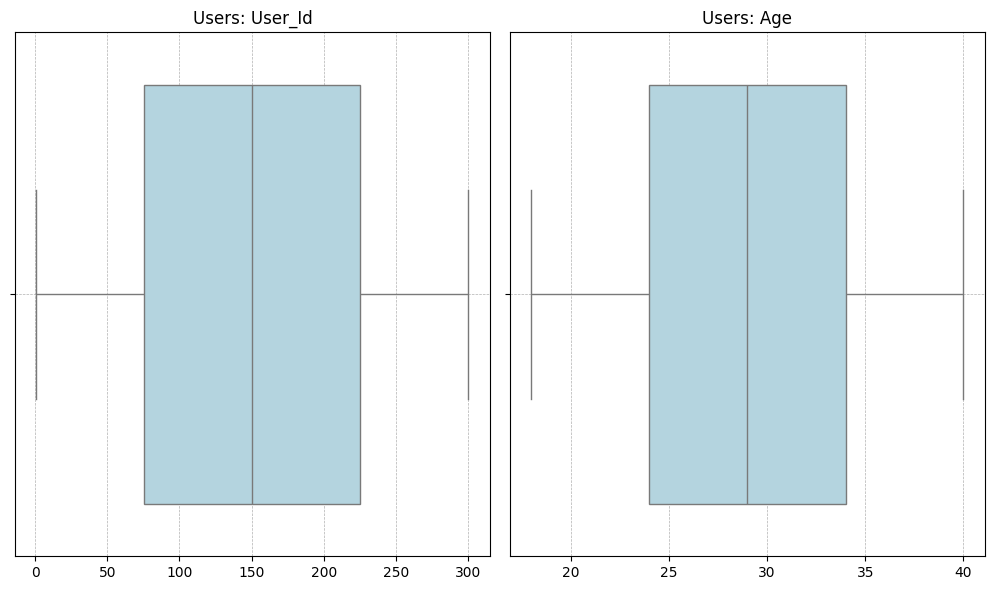

In [36]:
#Visualize outliers
plot_boxplots(places_df, title_prefix="Places")
plot_boxplots(ratings_df, title_prefix="Ratings")
plot_boxplots(users_df, title_prefix="Users")

In [ ]:
# we will move forward with the outliers instead on removing them to cover the edge cases

### Visualze nature of data

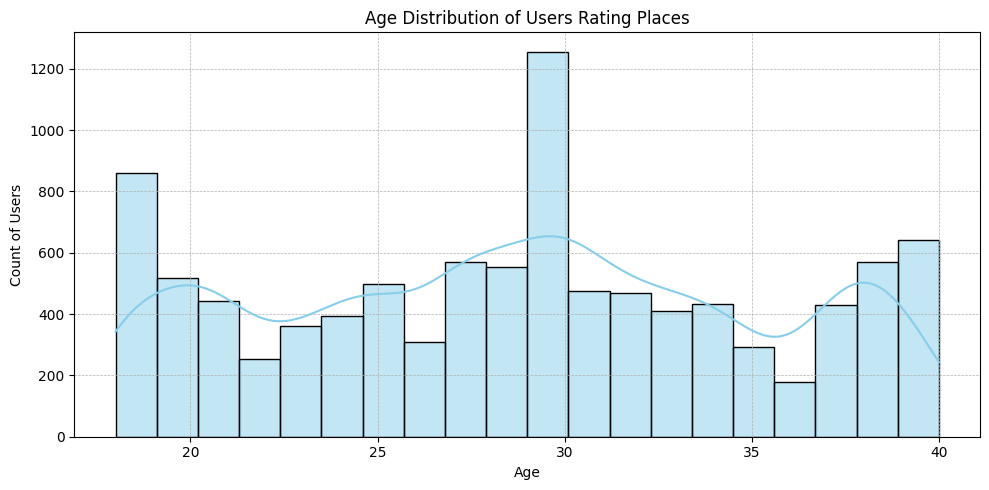

In [39]:
user_ratings_df = pd.merge(ratings_df, users_df, on='User_Id')

import matplotlib.pyplot as plt
import seaborn as sns

#Age Distribution of Users Rating Places
plt.figure(figsize=(10, 5))
sns.histplot(user_ratings_df['Age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution of Users Rating Places")
plt.xlabel("Age")
plt.ylabel("Count of Users")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

<ipython-input-40-97503c804b0f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='Blues_d')


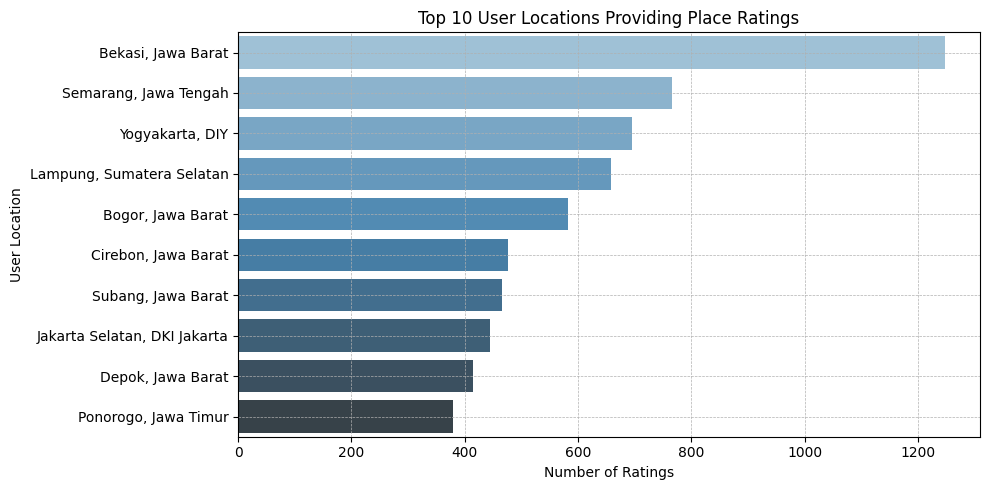

In [40]:
#Top Locations Users Are Coming From

top_locations = user_ratings_df['Location'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='Blues_d')
plt.title("Top 10 User Locations Providing Place Ratings")
plt.xlabel("Number of Ratings")
plt.ylabel("User Location")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

<ipython-input-41-5ce83c9b7543>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories.values, y=categories.index, palette='viridis')


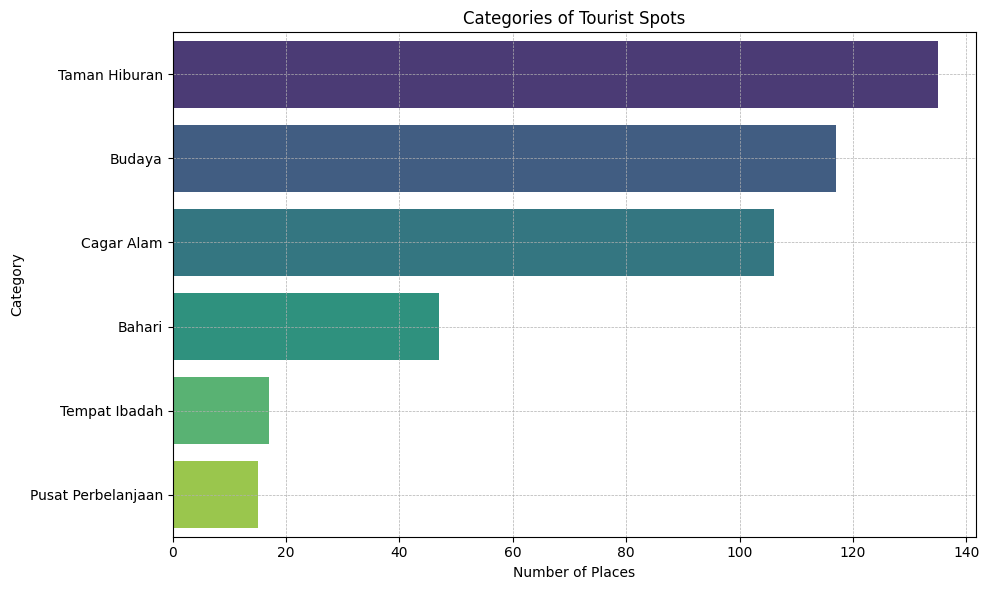

Unique categories of tourist spots:
 ['Budaya' 'Taman Hiburan' 'Cagar Alam' 'Bahari' 'Pusat Perbelanjaan'
 'Tempat Ibadah']


In [41]:
# different categories of tourist spots
categories = places_df['Category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=categories.values, y=categories.index, palette='viridis')
plt.title("Categories of Tourist Spots")
plt.xlabel("Number of Places")
plt.ylabel("Category")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

print("Unique categories of tourist spots:\n", places_df['Category'].unique())

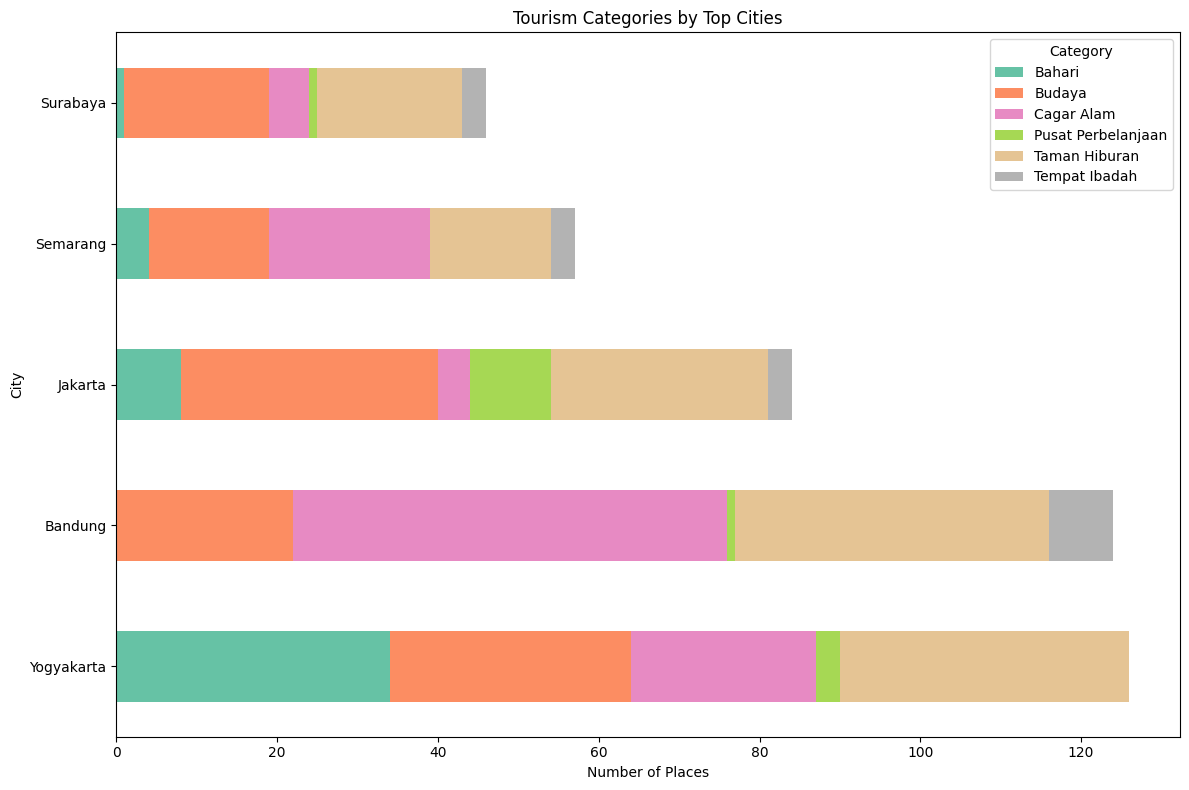

In [42]:
# What kind of tourism each location (city) is most famous or suitable for?

city_category_counts = places_df.groupby(['City', 'Category'])['Place_Id'].count().reset_index()
city_category_pivot = city_category_counts.pivot(index='City', columns='Category', values='Place_Id').fillna(0)

# Top 10 cities with most variety (or total) in tourist spots
top_cities = city_category_pivot.sum(axis=1).sort_values(ascending=False).head(10)
city_category_pivot.loc[top_cities.index].plot(kind='barh', stacked=True, figsize=(12, 8), colormap='Set2')
plt.title("Tourism Categories by Top Cities")
plt.xlabel("Number of Places")
plt.ylabel("City")
plt.tight_layout()
plt.show()

In [55]:
#Which city would be the best for a nature enthusiast to visit?

# we will usually connect with domain expert to collect collection of words to look for but now we have generally taken these
nature_keywords = ['nature', 'forest', 'green', 'tree', 'trees', 'mountain', 'mountains', 'hill', 'hills', 'wildlife']

pattern = '|'.join(nature_keywords)

nature_related_places = places_df[
    places_df['Category'].str.contains(pattern, case=False, na=False) |
    places_df['Description'].str.contains(pattern, case=False, na=False)
]

best_nature_city = nature_related_places['City'].value_counts().idxmax()
best_nature_count = nature_related_places['City'].value_counts().max()

print(f"The best city for a nature enthusiast is: **{best_nature_city}** with {best_nature_count} nature-related spots.")

nature_related_places["City"].value_counts()

The best city for a nature enthusiast is: **Bandung** with 6 nature-related spots.


,count
City,
Bandung,6
Jakarta,3
Yogyakarta,2
Semarang,1


In [57]:
# Merge ratings_df and places_df on Place_Id
combined_df = ratings_df.merge(places_df, on='Place_Id', how='left')

# Find most loved tourist spots (highest average rating)
avg_rating_per_place = combined_df.groupby(['Place_Id', 'Place_Name', 'City']).agg({'Place_Ratings': 'mean'}).reset_index()

most_loved_spots = avg_rating_per_place.sort_values(by='Place_Ratings', ascending=False)

print("Top 10 most loved tourist spots:")
print(most_loved_spots.head(10))

Top 10 most loved tourist spots:
     Place_Id                             Place_Name        City  \
415       416                       Keraton Surabaya    Surabaya   
138       139  Puncak Gunung Api Purba - Nglanggeran  Yogyakarta   
51         52                           Kampung Cina     Jakarta   
321       322                            Bukit Jamur     Bandung   
253       254                 Teras Cikapundung BBWS     Bandung   
111       112               Bukit Bintang Yogyakarta  Yogyakarta   
96         97                  Monumen Yogya Kembali  Yogyakarta   
320       321            Glamping Lakeside Rancabali     Bandung   
0           1                       Monumen Nasional     Jakarta   
156       157                           Pantai Baron  Yogyakarta   

     Place_Ratings  
415       3.933333  
138       3.882353  
51        3.842105  
321       3.793103  
253       3.789474  
111       3.764706  
96        3.761905  
320       3.750000  
0         3.722222  
156     

In [65]:
# Find city with most loved tourist spots

#City with highest average rating overall:
avg_rating_per_city = combined_df.groupby('City').agg({'Place_Ratings': 'mean'}).reset_index()
best_city = avg_rating_per_city.sort_values(by='Place_Ratings', ascending=False).iloc[0]

print(f"City with highest average tourist rating: {best_city['City']} with avg rating {best_city['Place_Ratings']:.2f}")

# City with most spots rated above a threshold (e.g., >4.5):
highly_rated_spots = avg_rating_per_place[avg_rating_per_place['Place_Ratings'] > 3] # 3 beacuse no 4.5, or 4 rating found
highly_rated_spots.head()

city_most_loved_spots = highly_rated_spots['City'].value_counts().idxmax()

print(f"City with most highly loved spots (rating >3): {city_most_loved_spots}")

City with highest average tourist rating: Yogyakarta with avg rating 3.10
City with most highly loved spots (rating >3): Yogyakarta


In [66]:
# Find most liked category by users
avg_rating_per_category = combined_df.groupby('Category').agg({'Place_Ratings': 'mean'}).reset_index()
best_category = avg_rating_per_category.sort_values(by='Place_Ratings', ascending=False).iloc[0]

print(f"Most liked category: {best_category['Category']} with avg rating {best_category['Place_Ratings']:.2f}")

Most liked category: Taman Hiburan with avg rating 3.12


### Build recommendation model

In [67]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Use combined_df with ratings + place info
user_place_matrix = combined_df.pivot_table(index='User_Id', columns='Place_Name', values='Place_Ratings').fillna(0)

In [68]:
# Transpose for item-based similarity (places as rows)
place_similarity = cosine_similarity(user_place_matrix.T)

# Convert to DataFrame for easier indexing
place_similarity_df = pd.DataFrame(place_similarity, index=user_place_matrix.columns, columns=user_place_matrix.columns)

In [69]:
def recommend_places(place_name, similarity_df, top_n=5):
    if place_name not in similarity_df.columns:
        return f"Place '{place_name}' not found in dataset."

    # Sort places based on similarity scores in descending order except the place itself
    similar_scores = similarity_df[place_name].sort_values(ascending=False).drop(place_name)

    # Get top_n similar places
    recommended_places = similar_scores.head(top_n).index.tolist()

    return recommended_places

In [71]:
place_to_check = "Keraton Surabaya"  # Replace with actual place name from data
recommendations = recommend_places(place_to_check, place_similarity_df, top_n=5)
print(f"Places similar to '{place_to_check}':\n", recommendations)

Places similar to 'Keraton Surabaya':
 ['Perkebunan Teh Malabar', 'Roemah Seni Sarasvati', 'Jembatan Biru Ambarawa', 'Kyotoku Floating Market', 'Sudut Pandang Bandung']
